# Clustering

### Hierarchical Clustering


In [77]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hc
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import fcluster

In [78]:
bank_df = pd.read_csv('bankcustomers.csv')
bank_df

,Unnamed: 0,id,age,sex,region,income,married,children,car,savings,checking,mortgage,pep
0,0,ID12101,48,1,1,17546.00,0,1,0,0,0,0,1
1,1,ID12102,40,0,2,30085.10,1,3,1,0,1,1,0
2,2,ID12103,51,1,1,16575.40,1,0,1,1,1,0,0
3,3,ID12104,23,1,2,20375.40,1,3,0,0,1,0,0
4,4,ID12105,57,1,3,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,ID12696,61,1,1,47025.00,0,2,1,1,1,1,0
596,596,ID12697,30,1,1,9672.25,1,0,1,1,1,0,0
597,597,ID12698,31,1,2,15976.30,1,0,1,1,0,0,1
598,598,ID12699,29,0,1,14711.80,1,0,0,1,0,1,0


In [79]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [80]:
#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(bank_df[['region']]).toarray().astype(int))
encoder_df

,0,1,2,3
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
595,1,0,0,0
596,1,0,0,0
597,0,1,0,0
598,1,0,0,0


In [102]:
#merge one-hot encoded columns back with original DataFrame
final_df = bank_df.join(encoder_df)

In [103]:
#view final df
print(final_df)

     Unnamed: 0       id  age  sex  region    income  married  children  car  \
0             0  ID12101   48    1       1  17546.00        0         1    0   
1             1  ID12102   40    0       2  30085.10        1         3    1   
2             2  ID12103   51    1       1  16575.40        1         0    1   
3             3  ID12104   23    1       2  20375.40        1         3    0   
4             4  ID12105   57    1       3  50576.30        1         0    0   
..          ...      ...  ...  ...     ...       ...      ...       ...  ...   
595         595  ID12696   61    1       1  47025.00        0         2    1   
596         596  ID12697   30    1       1   9672.25        1         0    1   
597         597  ID12698   31    1       2  15976.30        1         0    1   
598         598  ID12699   29    0       1  14711.80        1         0    0   
599         599  ID12700   38    0       2  26671.60        0         0    1   

     savings  checking  mortgage  pep  

In [104]:
#drop 'team' column
final_df.drop(['region','Unnamed: 0'], axis=1, inplace=True)


#view final df
print(final_df)

          id  age  sex    income  married  children  car  savings  checking  \
0    ID12101   48    1  17546.00        0         1    0        0         0   
1    ID12102   40    0  30085.10        1         3    1        0         1   
2    ID12103   51    1  16575.40        1         0    1        1         1   
3    ID12104   23    1  20375.40        1         3    0        0         1   
4    ID12105   57    1  50576.30        1         0    0        1         0   
..       ...  ...  ...       ...      ...       ...  ...      ...       ...   
595  ID12696   61    1  47025.00        0         2    1        1         1   
596  ID12697   30    1   9672.25        1         0    1        1         1   
597  ID12698   31    1  15976.30        1         0    1        1         0   
598  ID12699   29    0  14711.80        1         0    0        1         0   
599  ID12700   38    0  26671.60        0         0    1        0         1   

     mortgage  pep  0  1  2  3  
0           0    1

In [105]:
#rename columns
final_df.columns = ['id', 'age', 'sex', 'income', 'married', 'children', 'car', 'savings','checking','mortgage','pep','inner_city','town', 'rural','suburban']

#view final df
print(final_df)


          id  age  sex    income  married  children  car  savings  checking  \
0    ID12101   48    1  17546.00        0         1    0        0         0   
1    ID12102   40    0  30085.10        1         3    1        0         1   
2    ID12103   51    1  16575.40        1         0    1        1         1   
3    ID12104   23    1  20375.40        1         3    0        0         1   
4    ID12105   57    1  50576.30        1         0    0        1         0   
..       ...  ...  ...       ...      ...       ...  ...      ...       ...   
595  ID12696   61    1  47025.00        0         2    1        1         1   
596  ID12697   30    1   9672.25        1         0    1        1         1   
597  ID12698   31    1  15976.30        1         0    1        1         0   
598  ID12699   29    0  14711.80        1         0    0        1         0   
599  ID12700   38    0  26671.60        0         0    1        0         1   

     mortgage  pep  inner_city  town  rural  suburb

In [106]:
final_df.isna().sum()

id            0
age           0
sex           0
income        0
married       0
children      0
car           0
savings       0
checking      0
mortgage      0
pep           0
inner_city    0
town          0
rural         0
suburban      0
dtype: int64

# Hierarchical Clustering
## Question 2

In [107]:
final_df_1 = final_df.copy()
final_df_1 = final_df_1.drop('id', axis = 1)
final_df_1.head()

,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,48,1,17546.0,0,1,0,0,0,0,1,1,0,0,0
1,40,0,30085.1,1,3,1,0,1,1,0,0,1,0,0
2,51,1,16575.4,1,0,1,1,1,0,0,1,0,0,0
3,23,1,20375.4,1,3,0,0,1,0,0,0,1,0,0
4,57,1,50576.3,1,0,0,1,0,0,0,0,0,1,0


In [87]:
ndf = normalize(final_df_1)
ndf = pd.DataFrame(ndf, columns=final_df_1.columns)
ndf

,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,0.002736,0.000057,0.999996,0.000000,0.000057,0.000000,0.000000,0.000000,0.000000,0.000057,0.000057,0.000000,0.00000,0.0
1,0.001330,0.000000,0.999999,0.000033,0.000100,0.000033,0.000000,0.000033,0.000033,0.000000,0.000000,0.000033,0.00000,0.0
2,0.003077,0.000060,0.999995,0.000060,0.000000,0.000060,0.000060,0.000060,0.000000,0.000000,0.000060,0.000000,0.00000,0.0
3,0.001129,0.000049,0.999999,0.000049,0.000147,0.000000,0.000000,0.000049,0.000000,0.000000,0.000000,0.000049,0.00000,0.0
4,0.001127,0.000020,0.999999,0.000020,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.00002,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.001297,0.000021,0.999999,0.000000,0.000043,0.000021,0.000021,0.000021,0.000021,0.000000,0.000021,0.000000,0.00000,0.0
596,0.003102,0.000103,0.999995,0.000103,0.000000,0.000103,0.000103,0.000103,0.000000,0.000000,0.000103,0.000000,0.00000,0.0
597,0.001940,0.000063,0.999998,0.000063,0.000000,0.000063,0.000063,0.000000,0.000000,0.000063,0.000000,0.000063,0.00000,0.0
598,0.001971,0.000000,0.999998,0.000068,0.000000,0.000000,0.000068,0.000000,0.000068,0.000000,0.000068,0.000000,0.00000,0.0


### CENTROID LINKAGE 

In [88]:
clstr1 = hc.linkage(ndf, method='centroid', metric="euclidean")

In [89]:
clstr1[0]

array([1.15000000e+02, 1.27000000e+02, 6.50256463e-06, 2.00000000e+00])

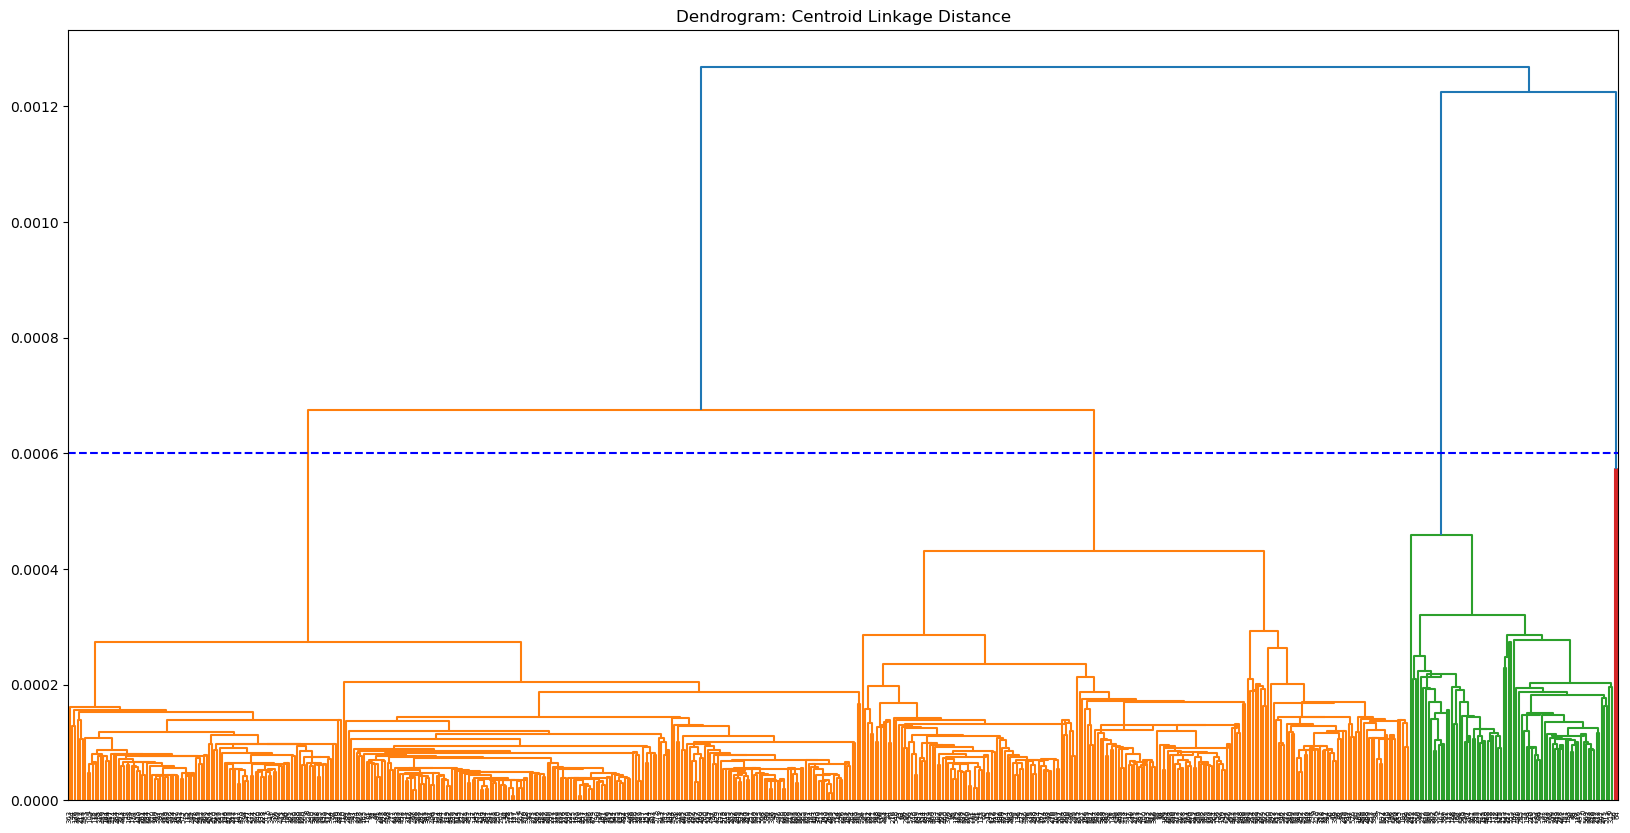

In [90]:
plt.figure(figsize=(20, 10))  
plt.title("Dendrogram: Centroid Linkage Distance")
dgnbb1 = hc.dendrogram(clstr1)
plt.axhline(y=0.0006, color='b', linestyle='--')
plt.show()

In [91]:
max(clstr1[:,2])

0.0012683363624996118

In [92]:
0.7*max(clstr1[:,2])

0.0008878354537497282

# Hierarchical Clustering: Single (Nearest) Linkage
## draw the dentrogram

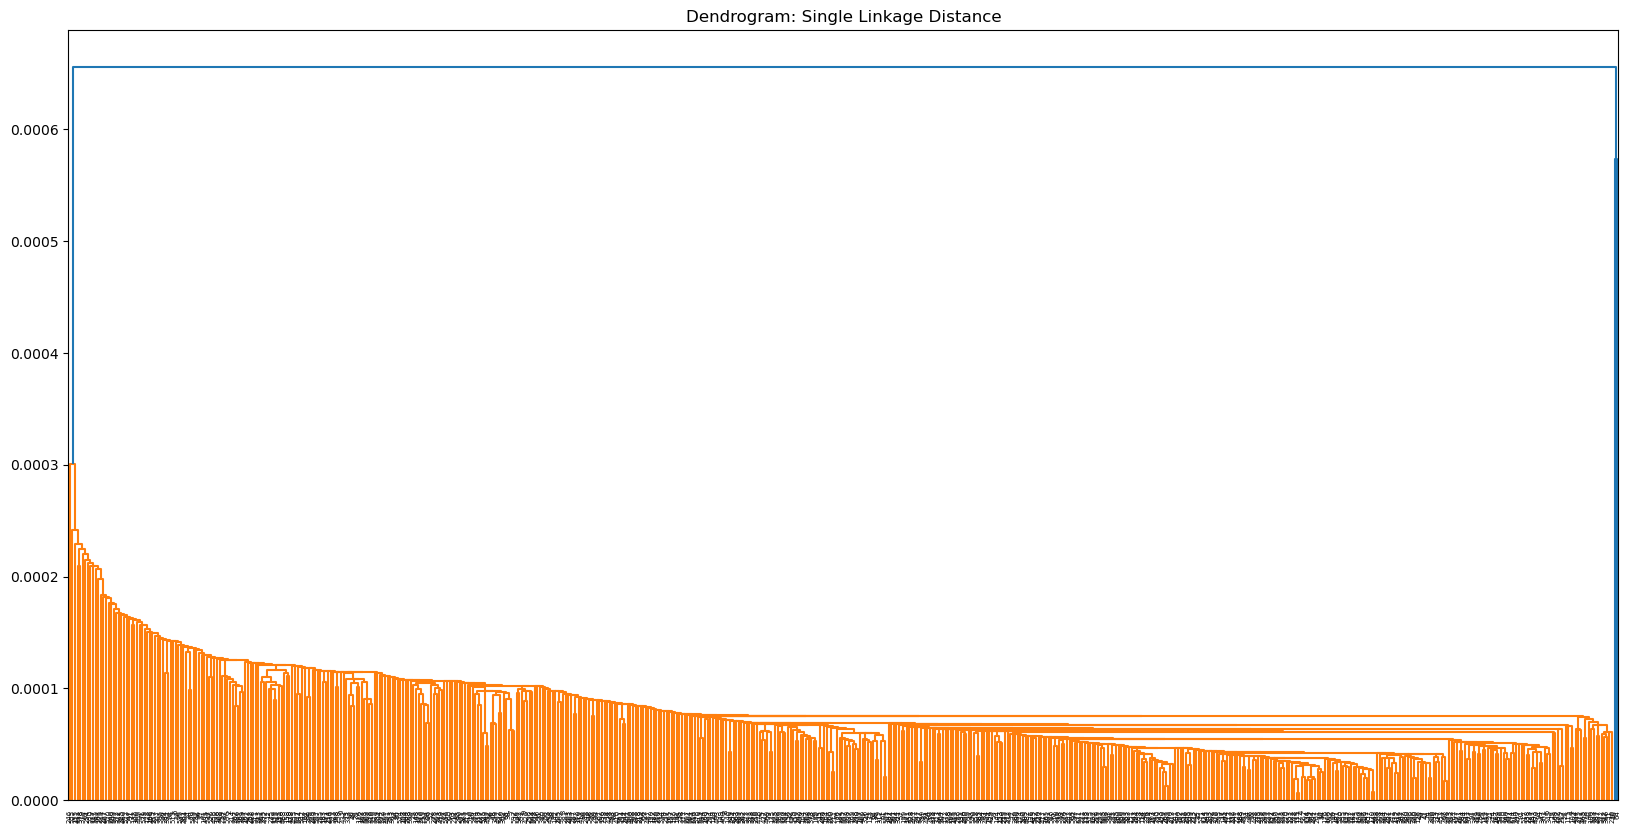

In [40]:
clstr2 = hc.linkage(ndf, method='single', metric="euclidean")
plt.figure(figsize=(20, 10))  
plt.title("Dendrogram: Single Linkage Distance")
dgnbb2 = hc.dendrogram(clstr2)

# Hierarchical Clustering: Complete Linkage
## draw the dentrogram

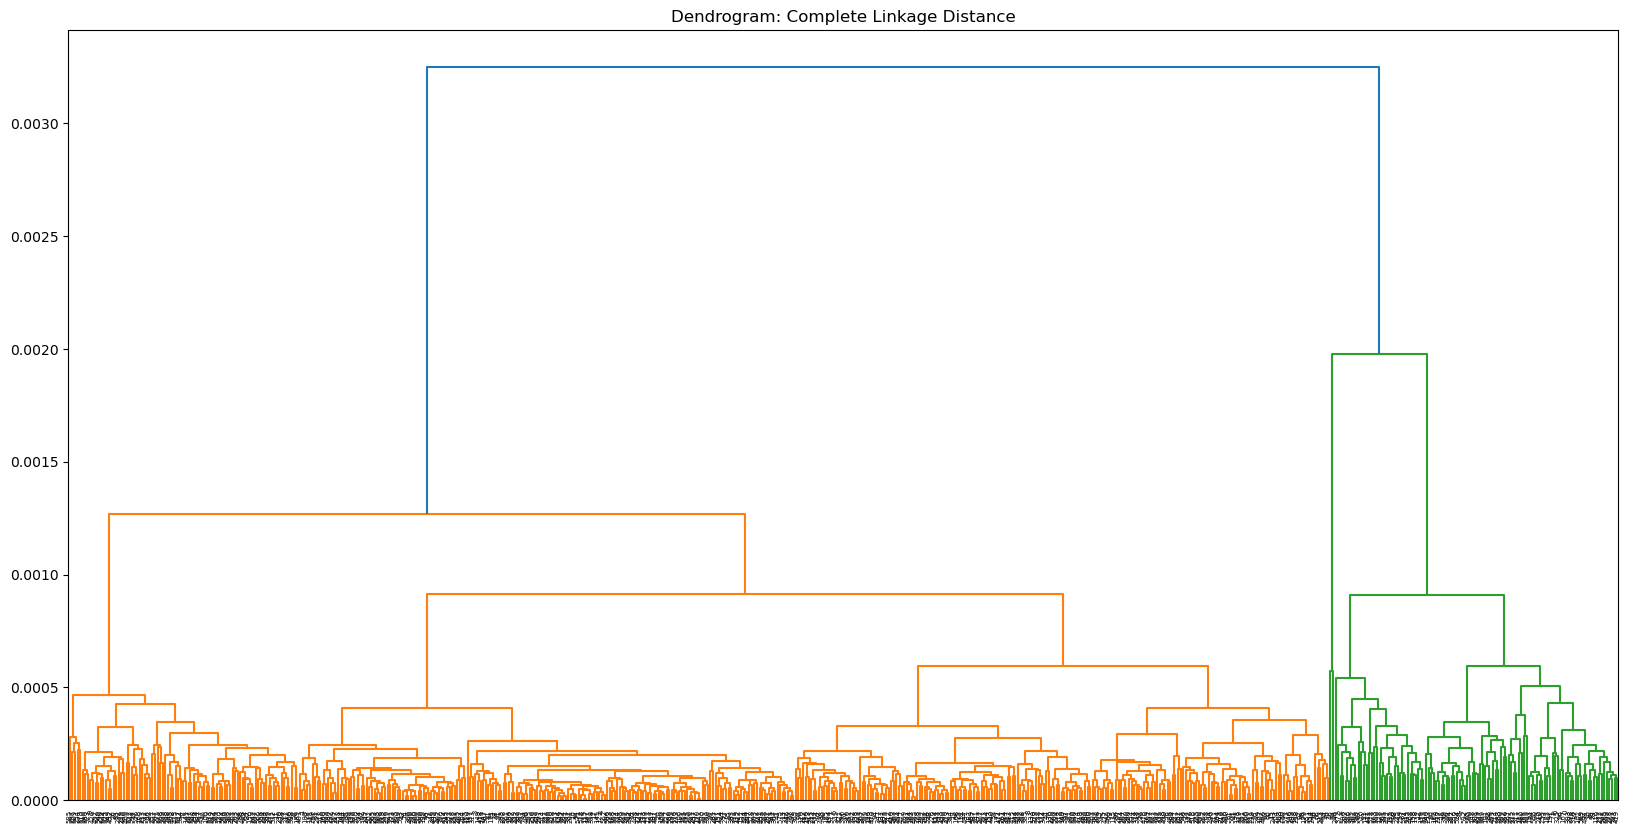

In [41]:
clstr3 = hc.linkage(ndf, method='complete', metric="euclidean")
plt.figure(figsize=(20, 10))  
plt.title("Dendrogram: Complete Linkage Distance")
dgnbb3 = hc.dendrogram(clstr3)

# Hierarchical Clustering: Average Linkage
## draw the dentrogram

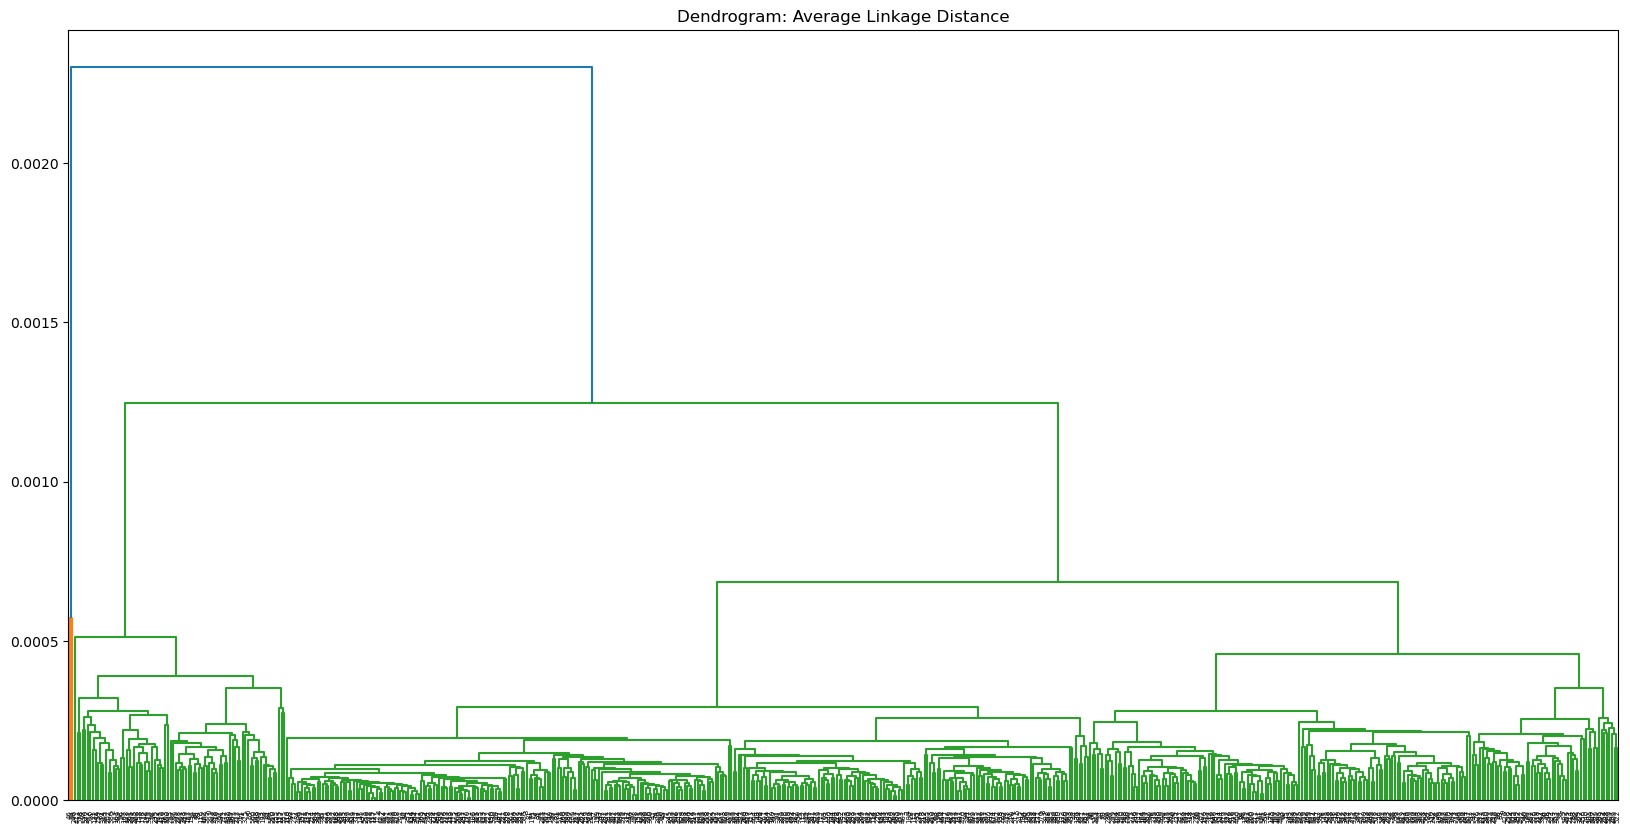

In [43]:
clstr4 = hc.linkage(ndf, method='average', metric="euclidean")
plt.figure(figsize=(20, 10))  
plt.title("Dendrogram: Average Linkage Distance")
dgnbb4 = hc.dendrogram(clstr4)

# Hierarchical Clustering: Ward Linkage
## merge clusters based on the smallest increase in the Sum-of-Squares
### draw the dentrogram

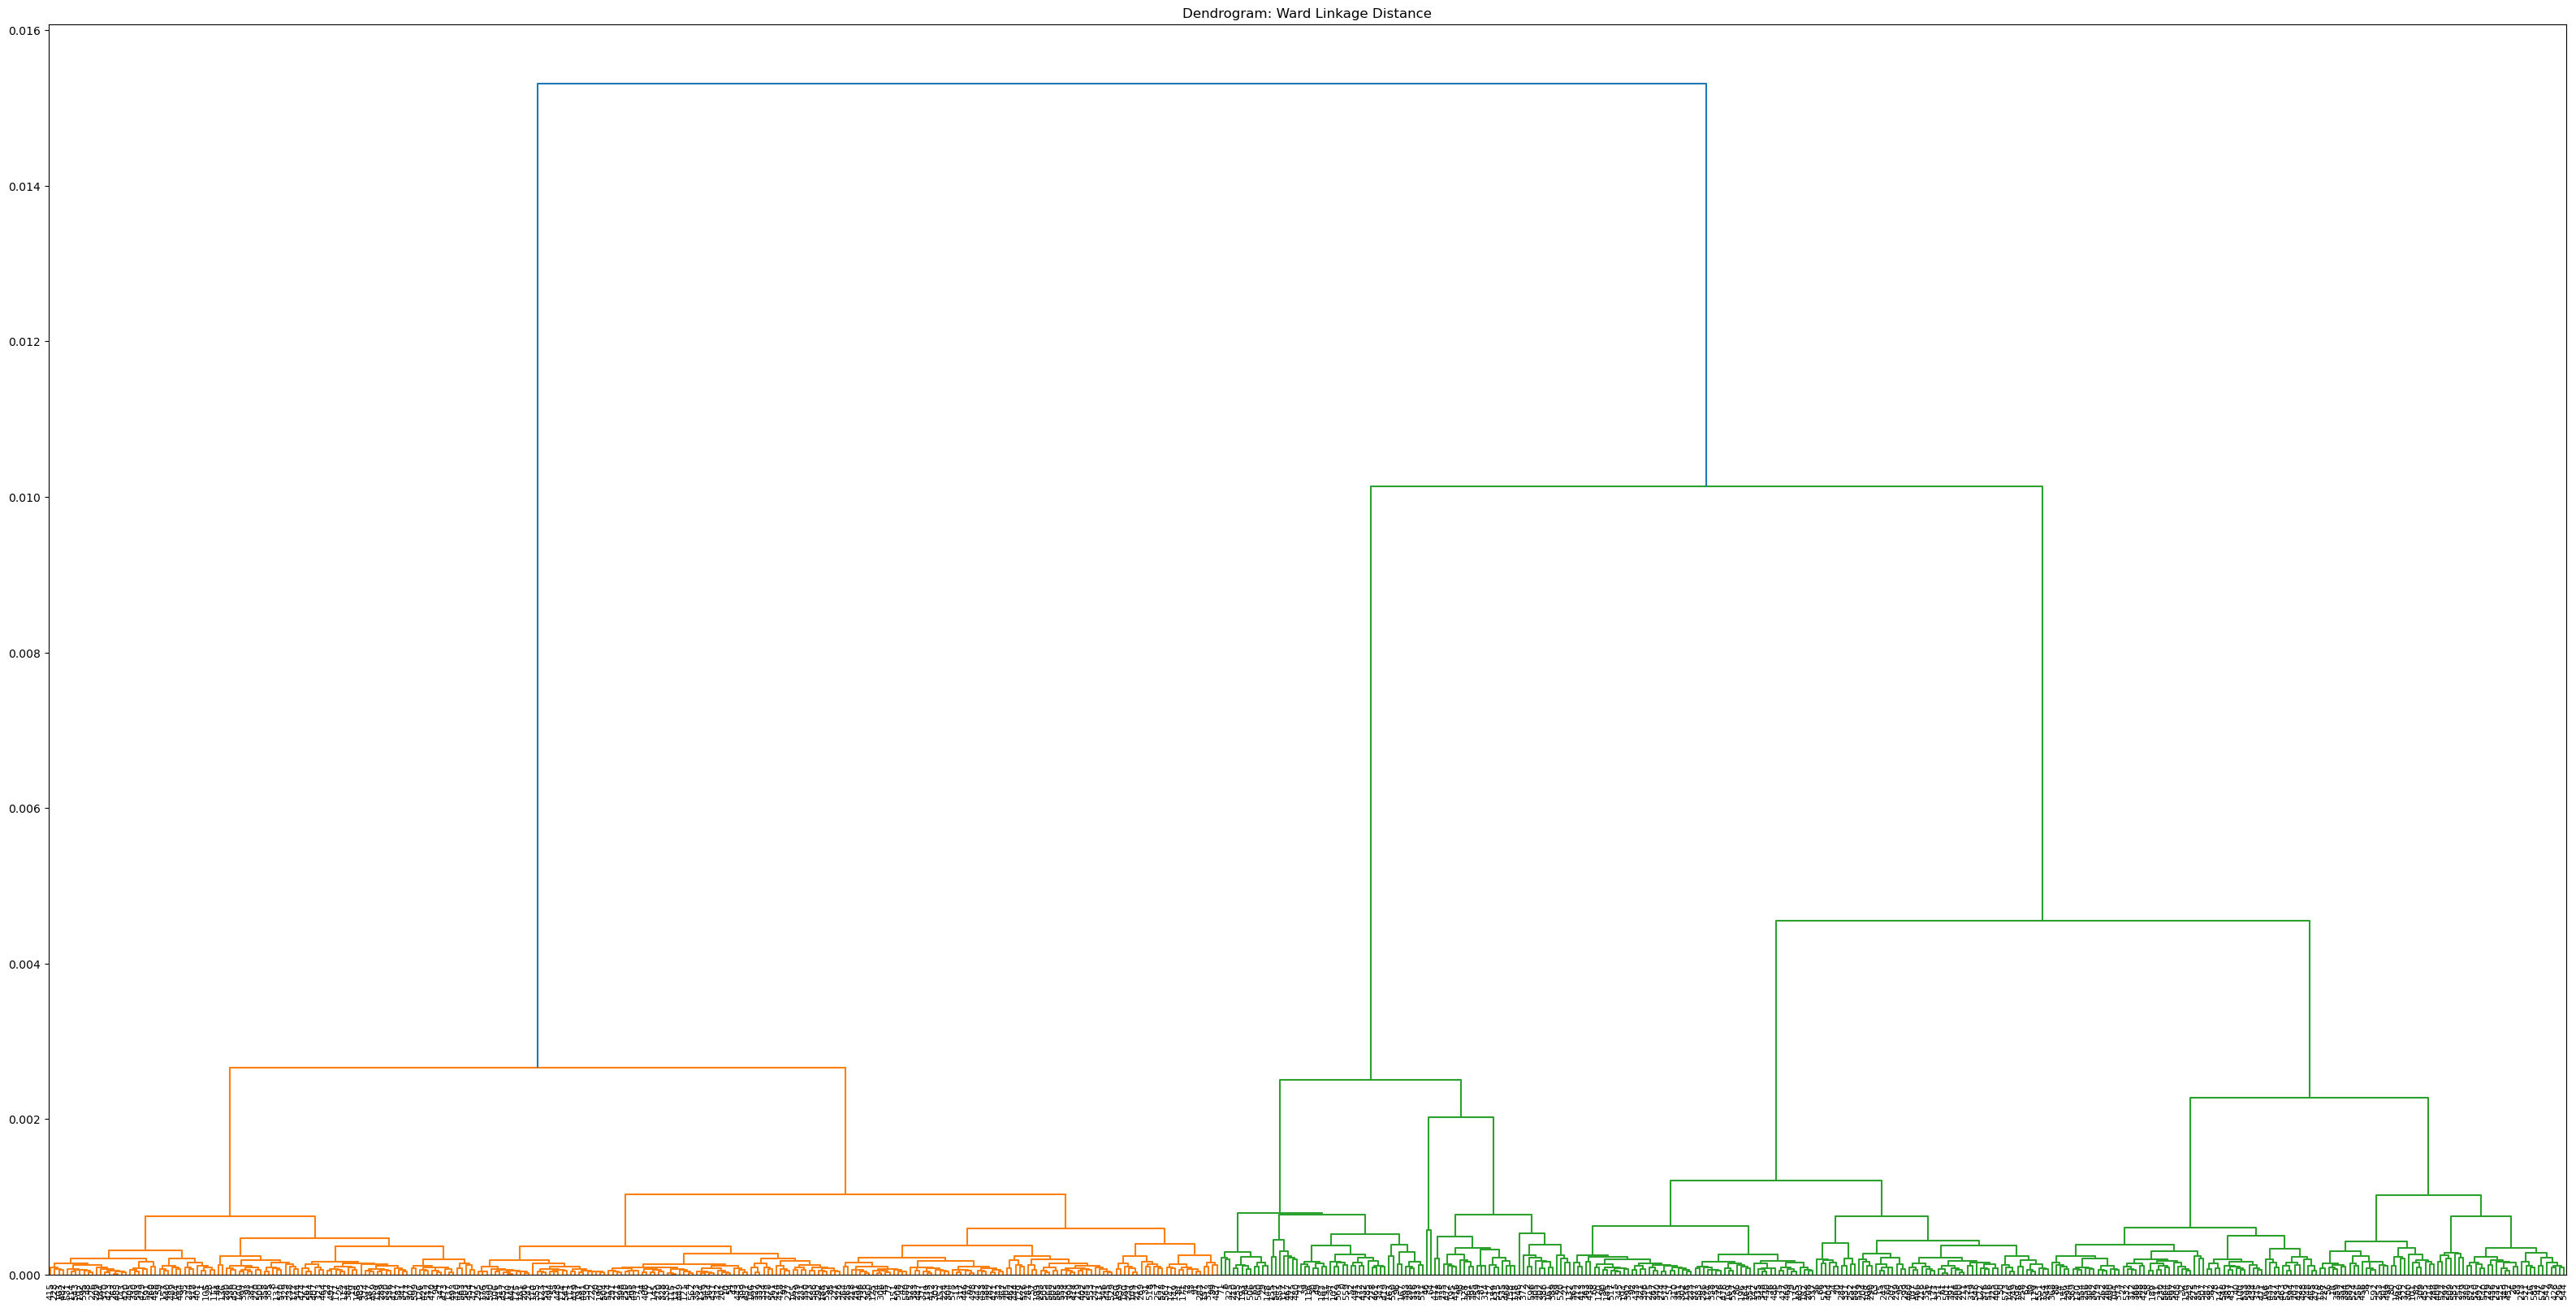

In [44]:
clstr5 = hc.linkage(ndf, method='ward', metric="euclidean")
plt.figure(figsize=(40, 20))  
plt.title("Dendrogram: Ward Linkage Distance")
dgnbb5 = hc.dendrogram(clstr5, leaf_rotation=90., leaf_font_size=8.)

# K-MEANS CLUSTERING

In [95]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as km
from sklearn.preprocessing import normalize

In [96]:
km_clstr2 = km(n_clusters=2, random_state=0) 
km_clstr2.fit(ndf)

KMeans(n_clusters=2, random_state=0)

In [97]:
km_clstr2.cluster_centers_

array([[2.43330381e-03, 3.39653653e-05, 9.99996946e-01, 4.14794237e-05,
        6.71707302e-05, 2.99276465e-05, 4.02252627e-05, 4.82877064e-05,
        2.31249596e-05, 2.37899662e-05, 3.17461070e-05, 2.06841914e-05,
        8.27724119e-06, 5.85380526e-06],
       [1.38562106e-03, 1.76853891e-05, 9.99999002e-01, 2.50040429e-05,
        3.70169626e-05, 1.81433671e-05, 2.53768348e-05, 2.92608318e-05,
        1.30843483e-05, 1.62578757e-05, 1.69322608e-05, 1.00372206e-05,
        6.22391377e-06, 4.05574037e-06]])

### assign cluster membership labels 

In [98]:
km_clstr2 = km_clstr2.labels_
km_clstr2

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [108]:
ndf2 = final_df_1.copy()
ndf2['CLUSTER'] = km_clstr2.tolist()
ndf2

,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban,CLUSTER
0,48,1,17546.00,0,1,0,0,0,0,1,1,0,0,0,0
1,40,0,30085.10,1,3,1,0,1,1,0,0,1,0,0,1
2,51,1,16575.40,1,0,1,1,1,0,0,1,0,0,0,0
3,23,1,20375.40,1,3,0,0,1,0,0,0,1,0,0,1
4,57,1,50576.30,1,0,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,47025.00,0,2,1,1,1,1,0,1,0,0,0,1
596,30,1,9672.25,1,0,1,1,1,0,0,1,0,0,0,0
597,31,1,15976.30,1,0,1,1,0,0,1,0,1,0,0,0
598,29,0,14711.80,1,0,0,1,0,1,0,1,0,0,0,0


#### check cluster sizes 

In [109]:
ndf2['CLUSTER'].value_counts()

1    418
0    182
Name: CLUSTER, dtype: int64

In [110]:
ndf2Avg = ndf2.groupby('CLUSTER', as_index=False).mean()
ndf2Avg

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,0,41.587912,0.538462,17422.635824,0.648352,1.000000,0.461538,0.615385,0.714286,0.351648,0.401099,0.478022,0.318681,0.115385,0.087912
1,1,42.746411,0.483254,31922.246435,0.665072,1.016746,0.507177,0.722488,0.777512,0.346890,0.480861,0.435407,0.275120,0.179426,0.110048


In [111]:
#. Create CLuster
km_clstr3 = km(n_clusters=3, random_state=0) 
km_clstr3.fit(ndf)
print(km_clstr3.cluster_centers_)

# Membership labels
km_clstr3 = km_clstr3.labels_
print(km_clstr3)

# Add to DF
ndf3 = final_df_1.copy()
ndf3['CLUSTER'] = km_clstr3.tolist()
print(ndf3)

# Check the cluster size
print(ndf3['CLUSTER'].value_counts())

# get averages by cluster to see how the clusters are different 
ndf3Avg = ndf3.groupby('CLUSTER', as_index=False).mean()
ndf3Avg

[[2.70123816e-03 3.88049765e-05 9.99996288e-01 4.58003718e-05
  6.62768509e-05 3.04893852e-05 4.31672557e-05 5.31437487e-05
  2.25397630e-05 2.35022862e-05 3.70500112e-05 2.04255771e-05
  7.87949310e-06 7.14605512e-06]
 [1.25692065e-03 1.60586464e-05 9.99999194e-01 2.25785592e-05
  3.41329598e-05 1.67173758e-05 2.38881089e-05 2.62678283e-05
  1.17789148e-05 1.58287402e-05 1.48029209e-05 8.95077429e-06
  6.35030333e-06 3.40123218e-06]
 [1.87961634e-03 2.43834241e-05 9.99998204e-01 3.33655486e-05
  5.46378417e-05 2.50139084e-05 3.23040778e-05 3.93027358e-05
  1.96705716e-05 2.02217189e-05 2.35861303e-05 1.63382714e-05
  7.08488597e-06 5.14986252e-06]]
[0 1 0 1 1 1 0 0 1 2 1 2 0 1 2 2 2 1 0 1 1 0 1 2 2 1 2 2 1 0 0 1 2 1 1 1 2
 0 0 0 2 2 1 1 1 1 0 2 1 0 2 1 0 2 1 1 0 1 2 1 2 2 2 2 0 0 2 1 1 0 2 0 1 0
 1 2 2 1 2 2 2 1 0 2 0 1 2 0 2 2 1 1 1 1 1 2 0 1 0 1 2 0 0 1 2 1 1 2 2 1 1
 1 1 1 1 1 0 0 2 1 1 1 2 1 1 1 1 1 0 1 2 1 0 2 1 2 1 1 1 1 1 2 2 1 1 1 2 1
 0 1 2 1 1 1 2 0 2 1 0 0 1 0 0 0 2 1 2 0 1

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,0,42.461538,0.557692,15886.923365,0.673077,0.913462,0.413462,0.615385,0.711538,0.307692,0.355769,0.490385,0.288462,0.115385,0.105769
1,1,43.000000,0.482085,34726.298046,0.664495,1.032573,0.511401,0.768730,0.781759,0.348534,0.508143,0.429967,0.270358,0.198697,0.100977
2,2,41.375661,0.497354,22228.598942,0.645503,1.031746,0.507937,0.603175,0.746032,0.370370,0.428571,0.455026,0.317460,0.121693,0.105820


In [57]:
#. Create CLuster
km_clstr4 = km(n_clusters=4, random_state=0) 
km_clstr4.fit(ndf)
print(km_clstr4.cluster_centers_)

# Membership labels
km_clstr4 = km_clstr4.labels_
print(km_clstr4)

# Add to DF
ndf4 = final_df_1.copy()
ndf4['CLUSTER'] = km_clstr4.tolist()
print(ndf3)

# Check the cluster size
print(ndf4['CLUSTER'].value_counts())

# get averages by cluster to see how the clusters are different 
ndf4Avg = ndf4.groupby('CLUSTER', as_index=False).mean()
ndf4Avg

[[1.20348038e-03 1.48040826e-05 9.99999266e-01 2.08181539e-05
  3.25116788e-05 1.62841535e-05 2.30022167e-05 2.52937057e-05
  1.10243063e-05 1.68899260e-05 1.40700848e-05 8.67432391e-06
  5.96955489e-06 3.21229402e-06]
 [2.13355557e-03 3.14456133e-05 9.99997696e-01 4.11823291e-05
  6.62014440e-05 3.13337183e-05 4.09088799e-05 4.52425118e-05
  2.07907444e-05 2.33381739e-05 2.49365619e-05 1.92715926e-05
  8.94564262e-06 7.54208325e-06]
 [1.64913300e-03 2.15172802e-05 9.99998623e-01 3.11507632e-05
  4.34889363e-05 1.99820313e-05 2.88961752e-05 3.46735171e-05
  1.61815267e-05 1.48184475e-05 2.16675211e-05 1.24354430e-05
  6.20425056e-06 4.67901997e-06]
 [2.80946987e-03 3.75914630e-05 9.99996000e-01 4.14068433e-05
  6.74910250e-05 2.93494693e-05 3.86041136e-05 5.26327755e-05
  2.58092961e-05 2.49006920e-05 3.94050719e-05 2.13062130e-05
  8.07902384e-06 4.81510478e-06]]
[3 0 3 0 0 2 3 1 2 1 0 1 3 0 2 2 1 0 1 0 0 3 0 2 2 0 1 1 0 3 3 0 1 0 0 0 2
 3 1 3 1 2 0 0 2 0 3 1 0 3 2 2 3 2 0 0 1 0 1 0 2

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,0,0.001203,0.000015,0.999999,0.000021,0.000033,0.000016,0.000023,0.000025,0.000011,0.000017,0.000014,0.000009,0.000006,0.000003
1,1,0.002134,0.000031,0.999998,0.000041,0.000066,0.000031,0.000041,0.000045,0.000021,0.000023,0.000025,0.000019,0.000009,0.000008
2,2,0.001649,0.000022,0.999999,0.000031,0.000043,0.000020,0.000029,0.000035,0.000016,0.000015,0.000022,0.000012,0.000006,0.000005
3,3,0.002809,0.000038,0.999996,0.000041,0.000067,0.000029,0.000039,0.000053,0.000026,0.000025,0.000039,0.000021,0.000008,0.000005


In [58]:
#. Create CLuster
km_clstr5 = km(n_clusters=5, random_state=0) 
km_clstr5.fit(ndf)
print(km_clstr5.cluster_centers_)

# Membership labels
km_clstr5 = km_clstr5.labels_
print(km_clstr5)

# Add to DF
ndf5 = final_df_1.copy()
ndf5['CLUSTER'] = km_clstr5.tolist()
print(ndf3)

# Check the cluster size
print(ndf5['CLUSTER'].value_counts())

# get averages by cluster to see how the clusters are different 
ndf5Avg = ndf5.groupby('CLUSTER', as_index=False).mean()
ndf5Avg

[[2.83832283e-03 3.85808069e-05 9.99995919e-01 4.28075139e-05
  7.22829476e-05 3.07806897e-05 4.17585697e-05 5.32909480e-05
  2.62658001e-05 2.16958953e-05 4.06158959e-05 2.19102932e-05
  6.72764747e-06 5.28323997e-06]
 [1.82715879e-03 2.28218673e-05 9.99998314e-01 3.23122721e-05
  4.90625358e-05 2.58321140e-05 3.15446769e-05 4.03062555e-05
  1.81236665e-05 1.87952038e-05 2.42122399e-05 1.46811910e-05
  7.27540080e-06 4.16197311e-06]
 [2.26291374e-03 3.23048335e-05 9.99997415e-01 4.31878309e-05
  6.48765588e-05 2.76154140e-05 4.24350736e-05 4.34994608e-05
  1.90446818e-05 2.64715753e-05 2.49406491e-05 2.09198122e-05
  9.03659475e-06 8.68031169e-06]
 [1.15451886e-03 1.50547138e-05 9.99999327e-01 2.05705250e-05
  3.06530602e-05 1.56824776e-05 2.17367921e-05 2.48329379e-05
  1.08197140e-05 1.61332735e-05 1.35483721e-05 8.43822284e-06
  5.46181251e-06 3.47736549e-06]
 [1.45071563e-03 1.93271408e-05 9.99998937e-01 2.70960256e-05
  4.11717525e-05 1.82899631e-05 2.66093063e-05 3.00828892e-05


,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,0,0.002838,0.000039,0.999996,0.000043,0.000072,0.000031,0.000042,0.000053,0.000026,0.000022,0.000041,0.000022,0.000007,0.000005
1,1,0.001827,0.000023,0.999998,0.000032,0.000049,0.000026,0.000032,0.000040,0.000018,0.000019,0.000024,0.000015,0.000007,0.000004
2,2,0.002263,0.000032,0.999997,0.000043,0.000065,0.000028,0.000042,0.000043,0.000019,0.000026,0.000025,0.000021,0.000009,0.000009
3,3,0.001155,0.000015,0.999999,0.000021,0.000031,0.000016,0.000022,0.000025,0.000011,0.000016,0.000014,0.000008,0.000005,0.000003
4,4,0.001451,0.000019,0.999999,0.000027,0.000041,0.000018,0.000027,0.000030,0.000015,0.000016,0.000018,0.000010,0.000007,0.000004


In [59]:
#. Create CLuster
km_clstr6 = km(n_clusters=6, random_state=0) 
km_clstr6.fit(ndf)
print(km_clstr6.cluster_centers_)

# Membership labels
km_clstr6 = km_clstr6.labels_
print(km_clstr6)

# Add to DF
ndf6 = final_df_1.copy()
ndf6['CLUSTER'] = km_clstr6.tolist()
print(ndf6)

# Check the cluster size
print(ndf6['CLUSTER'].value_counts())

# get averages by cluster to see how the clusters are different 
ndf6Avg = ndf6.groupby('CLUSTER', as_index=False).mean()
ndf6Avg

[[2.79468201e-03 3.90594392e-05 9.99996061e-01 4.36552031e-05
  7.02615571e-05 2.74388859e-05 3.74233837e-05 5.10880410e-05
  2.46081506e-05 2.32488280e-05 4.04623941e-05 2.03254710e-05
  6.63548791e-06 5.21086682e-06]
 [1.82051156e-03 2.19398725e-05 9.99998327e-01 3.16430732e-05
  4.79471294e-05 2.55109636e-05 3.19554953e-05 4.02449760e-05
  1.84515980e-05 1.91447978e-05 2.30250468e-05 1.51547778e-05
  7.51009115e-06 4.29623031e-06]
 [2.23978636e-03 3.25655064e-05 9.99997467e-01 4.40458721e-05
  6.84723451e-05 2.83353696e-05 4.28724357e-05 4.29412671e-05
  1.78193170e-05 2.37385224e-05 2.64664015e-05 1.92322185e-05
  8.91610682e-06 8.56457420e-06]
 [1.15451886e-03 1.50547138e-05 9.99999327e-01 2.05705250e-05
  3.06530602e-05 1.56824776e-05 2.17367921e-05 2.48329379e-05
  1.08197140e-05 1.61332735e-05 1.35483721e-05 8.43822284e-06
  5.46181251e-06 3.47736549e-06]
 [1.45071563e-03 1.93271408e-05 9.99998937e-01 2.70960256e-05
  4.11717525e-05 1.82899631e-05 2.66093063e-05 3.00828892e-05


,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,0,0.002795,0.000039,0.999996,0.000044,0.000070,0.000027,0.000037,0.000051,0.000025,0.000023,0.000040,0.000020,0.000007,0.000005
1,1,0.001821,0.000022,0.999998,0.000032,0.000048,0.000026,0.000032,0.000040,0.000018,0.000019,0.000023,0.000015,0.000008,0.000004
2,2,0.002240,0.000033,0.999997,0.000044,0.000068,0.000028,0.000043,0.000043,0.000018,0.000024,0.000026,0.000019,0.000009,0.000009
3,3,0.001155,0.000015,0.999999,0.000021,0.000031,0.000016,0.000022,0.000025,0.000011,0.000016,0.000014,0.000008,0.000005,0.000003
4,4,0.001451,0.000019,0.999999,0.000027,0.000041,0.000018,0.000027,0.000030,0.000015,0.000016,0.000018,0.000010,0.000007,0.000004
5,5,0.003976,0.000038,0.999992,0.000000,0.000038,0.000137,0.000137,0.000137,0.000100,0.000038,0.000038,0.000100,0.000000,0.000000


In [60]:
#. Create CLuster
km_clstr7 = km(n_clusters=7, random_state=0) 
km_clstr7.fit(ndf)
print(km_clstr7.cluster_centers_)

# Membership labels
km_clstr7 = km_clstr7.labels_
print(km_clstr7)

# Add to DF
ndf7 = final_df_1.copy()
ndf7['CLUSTER'] = km_clstr7.tolist()
print(ndf3)

# Check the cluster size
print(ndf7['CLUSTER'].value_counts())

# get averages by cluster to see how the clusters are different 
ndf7Avg = ndf7.groupby('CLUSTER', as_index=False).mean()
ndf7Avg

[[2.80944799e-03 3.85699176e-05 9.99996020e-01 4.46687101e-05
  7.43346908e-05 2.75403540e-05 3.95928552e-05 5.10293192e-05
  2.45174807e-05 2.09508793e-05 4.06934887e-05 1.99726039e-05
  7.02015388e-06 5.51294606e-06]
 [1.69669816e-03 2.30181379e-05 9.99998548e-01 3.07520944e-05
  4.79145422e-05 2.12994039e-05 3.01594382e-05 3.71862966e-05
  1.66334258e-05 1.73191959e-05 2.56652583e-05 1.23295021e-05
  5.33180429e-06 4.35445007e-06]
 [1.97143773e-03 2.46397839e-05 9.99998039e-01 3.81125644e-05
  6.47880805e-05 2.78329318e-05 3.42136652e-05 4.41230686e-05
  2.28289539e-05 1.99543991e-05 2.05018976e-05 2.01309217e-05
  9.64942688e-06 6.34096834e-06]
 [1.14541246e-03 1.50125419e-05 9.99999338e-01 2.06860204e-05
  3.15666019e-05 1.52859640e-05 2.14947960e-05 2.50610921e-05
  1.04123437e-05 1.60378533e-05 1.30070324e-05 8.83507602e-06
  5.82796754e-06 3.11811736e-06]
 [1.40585505e-03 1.70898302e-05 9.99999004e-01 2.43646672e-05
  3.66646787e-05 1.88647498e-05 2.61957488e-05 2.77011875e-05


,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,0,0.002809,0.000039,0.999996,0.000045,0.000074,0.000028,0.000040,0.000051,0.000025,0.000021,0.000041,0.000020,0.000007,0.000006
1,1,0.001697,0.000023,0.999999,0.000031,0.000048,0.000021,0.000030,0.000037,0.000017,0.000017,0.000026,0.000012,0.000005,0.000004
2,2,0.001971,0.000025,0.999998,0.000038,0.000065,0.000028,0.000034,0.000044,0.000023,0.000020,0.000021,0.000020,0.000010,0.000006
3,3,0.001145,0.000015,0.999999,0.000021,0.000032,0.000015,0.000021,0.000025,0.000010,0.000016,0.000013,0.000009,0.000006,0.000003
4,4,0.001406,0.000017,0.999999,0.000024,0.000037,0.000019,0.000026,0.000028,0.000013,0.000016,0.000017,0.000009,0.000007,0.000004
5,5,0.003976,0.000038,0.999992,0.000000,0.000038,0.000137,0.000137,0.000137,0.000100,0.000038,0.000038,0.000100,0.000000,0.000000
6,6,0.002323,0.000035,0.999997,0.000042,0.000050,0.000029,0.000042,0.000043,0.000018,0.000029,0.000028,0.000017,0.000008,0.000008


In [61]:
#. Create CLuster
km_clstr8 = km(n_clusters=8, random_state=0) 
km_clstr8.fit(ndf)
print(km_clstr8.cluster_centers_)

# Membership labels
km_clstr8 = km_clstr8.labels_
print(km_clstr8)

# Add to DF
ndf8 = final_df_1.copy()
ndf8['CLUSTER'] = km_clstr8.tolist()
print(ndf3)

# Check the cluster size
print(ndf8['CLUSTER'].value_counts())

# get averages by cluster to see how the clusters are different 
ndf8Avg = ndf8.groupby('CLUSTER', as_index=False).mean()
ndf8Avg

[[2.65170211e-03 3.19841433e-05 9.99996464e-01 3.97818029e-05
  6.99878301e-05 2.35756681e-05 3.28441410e-05 4.87582555e-05
  2.74160675e-05 2.63485650e-05 2.82211162e-05 2.30947597e-05
  9.90600373e-06 5.53015882e-06]
 [1.41714580e-03 1.72061777e-05 9.99998987e-01 2.49611193e-05
  3.89386849e-05 1.84423663e-05 2.72103443e-05 2.77794079e-05
  1.32509992e-05 1.55906927e-05 1.69922946e-05 9.40652499e-06
  7.30916881e-06 3.45023210e-06]
 [1.70634244e-03 2.27943729e-05 9.99998533e-01 2.99359801e-05
  4.71438731e-05 2.16772343e-05 2.89180407e-05 3.74632835e-05
  1.59378849e-05 1.78456446e-05 2.53612563e-05 1.27048910e-05
  5.31046154e-06 4.25766132e-06]
 [1.14835278e-03 1.52810841e-05 9.99999334e-01 2.09641469e-05
  3.08766215e-05 1.55485298e-05 2.16369768e-05 2.52435886e-05
  1.07814367e-05 1.59900402e-05 1.33194109e-05 8.64195961e-06
  5.70058027e-06 3.36803005e-06]
 [2.96831724e-03 4.59089170e-05 9.99995569e-01 4.64896027e-05
  6.57120075e-05 3.09489463e-05 4.07801446e-05 5.29161131e-05


,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,0,0.002652,0.000032,0.999996,0.000040,0.000070,0.000024,0.000033,0.000049,0.000027,0.000026,0.000028,0.000023,0.000010,0.000006
1,1,0.001417,0.000017,0.999999,0.000025,0.000039,0.000018,0.000027,0.000028,0.000013,0.000016,0.000017,0.000009,0.000007,0.000003
2,2,0.001706,0.000023,0.999999,0.000030,0.000047,0.000022,0.000029,0.000037,0.000016,0.000018,0.000025,0.000013,0.000005,0.000004
3,3,0.001148,0.000015,0.999999,0.000021,0.000031,0.000016,0.000022,0.000025,0.000011,0.000016,0.000013,0.000009,0.000006,0.000003
4,4,0.002968,0.000046,0.999996,0.000046,0.000066,0.000031,0.000041,0.000053,0.000019,0.000022,0.000056,0.000014,0.000006,0.000004
5,5,0.001969,0.000025,0.999998,0.000038,0.000065,0.000028,0.000034,0.000044,0.000023,0.000019,0.000020,0.000020,0.000010,0.000006
6,6,0.003976,0.000038,0.999992,0.000000,0.000038,0.000137,0.000137,0.000137,0.000100,0.000038,0.000038,0.000100,0.000000,0.000000
7,7,0.002288,0.000035,0.999997,0.000046,0.000056,0.000031,0.000049,0.000043,0.000017,0.000025,0.000029,0.000017,0.000006,0.000009
